In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import datasets, linear_model, metrics 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
import seaborn as sns
import statsmodels
import statsmodels.api as sm

In [2]:
df=pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Checking Unique Values

In [3]:
df.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [4]:
df.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [5]:
df.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [6]:
df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

# Data Cleaning

In [7]:
df.Additional_Info=df.Additional_Info.replace('No Info','No info')

In [8]:
df.drop(columns=['Route'],inplace=True)

In [9]:
df.drop(columns=['Dep_Time','Arrival_Time'],inplace=True)

In [10]:
#df.drop(columns=['Date_of_Journey'],inplace=True)

In [11]:
df.Destination.replace('New Delhi','Delhi',inplace=True)

In [12]:
df.replace('Delhi',1,inplace=True)
df.replace('Banglore',2,inplace=True)
df.replace('Cochin',3,inplace=True)
df.replace('Kolkata',4,inplace=True)
df.replace('Hyderabad',5,inplace=True)
df.replace('Chennai',6,inplace=True)
df.replace('Hyderabad',7,inplace=True)

In [13]:
df.replace('Mumbai',8,inplace=True)

In [14]:
df.Destination.unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [15]:
df.Source.unique()

array([2, 4, 1, 6, 8], dtype=int64)

In [16]:
df.Total_Stops.isnull().sum()

1

In [17]:
df.dropna(inplace=True)

In [18]:
df.Total_Stops.replace('non-stop','0 stop',inplace=True)

In [19]:
df.Total_Stops=df.Total_Stops.apply(lambda x: int(x.split(' ')[0]))

# Creating Dummy Variables

In [20]:
df = pd.get_dummies(df, columns=['Total_Stops'],drop_first=True)
#TS_dummy=pd.get_dummies(df.Total_Stops,prefix="Total_Stops")
#TS_dummy

In [21]:
df = pd.get_dummies(df, columns=['Source'],drop_first=True)
df = pd.get_dummies(df, columns=['Destination'],drop_first=True)

In [22]:
df = pd.get_dummies(df, columns=['Additional_Info'],drop_first=True)

In [23]:
h = df['Duration'].str.extract('(\d+)h', expand=False).astype(float) * 60
m = df['Duration'].str.extract('(\d+)m', expand=False).astype(float)
df['Duration'] = h.add(m, fill_value=0).astype(int)

In [24]:
df.Duration=df.Duration.astype(float)

In [25]:
df.Price=df.Price.astype(float)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Airline                                       10682 non-null  object 
 1   Date_of_Journey                               10682 non-null  object 
 2   Duration                                      10682 non-null  float64
 3   Price                                         10682 non-null  float64
 4   Total_Stops_1                                 10682 non-null  uint8  
 5   Total_Stops_2                                 10682 non-null  uint8  
 6   Total_Stops_3                                 10682 non-null  uint8  
 7   Total_Stops_4                                 10682 non-null  uint8  
 8   Source_2                                      10682 non-null  uint8  
 9   Source_4                                      10682 non-null 

In [27]:
df.Date_of_Journey=df.Date_of_Journey.astype('datetime64[ns]')

In [28]:
df

,Airline,Date_of_Journey,Duration,Price,Total_Stops_1,Total_Stops_2,Total_Stops_3,Total_Stops_4,Source_2,Source_4,...,Destination_4,Destination_5,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,IndiGo,2019-03-24,170.0,3897.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,Air India,2019-01-05,445.0,7662.0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,Jet Airways,2019-09-06,1140.0,13882.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,IndiGo,2019-12-05,325.0,6218.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,IndiGo,2019-01-03,285.0,13302.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,150.0,4107.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
10679,Air India,2019-04-27,155.0,4145.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
10680,Jet Airways,2019-04-27,180.0,7229.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
10681,Vistara,2019-01-03,160.0,12648.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


<AxesSubplot:xlabel='Duration', ylabel='Price'>

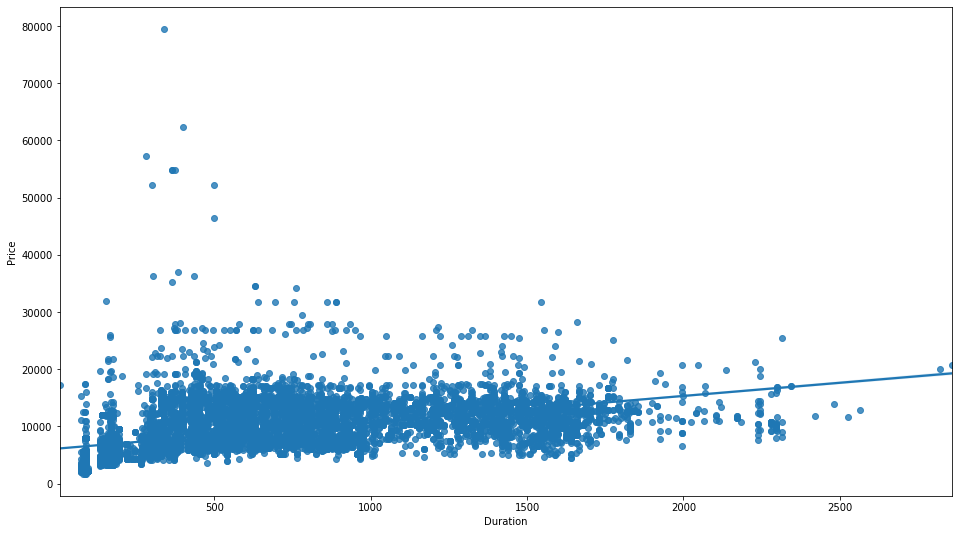

In [29]:
plt.figure(figsize= (16,9))
sns.regplot(x ="Duration", y ="Price",data = df)

In [30]:
#plt.figure(figsize= (16,9))
#sns.regplot(x ="Total_Stops", y ="Price",data = df)

In [31]:
#df.Duration.values.reshape(-1,1)
#df.Price.values.reshape(-1,1)

In [32]:
#plt.bar(df.Additional_Info,df.Price)
#plt.xticks(rotation=90)
#plt.show()

<AxesSubplot:>

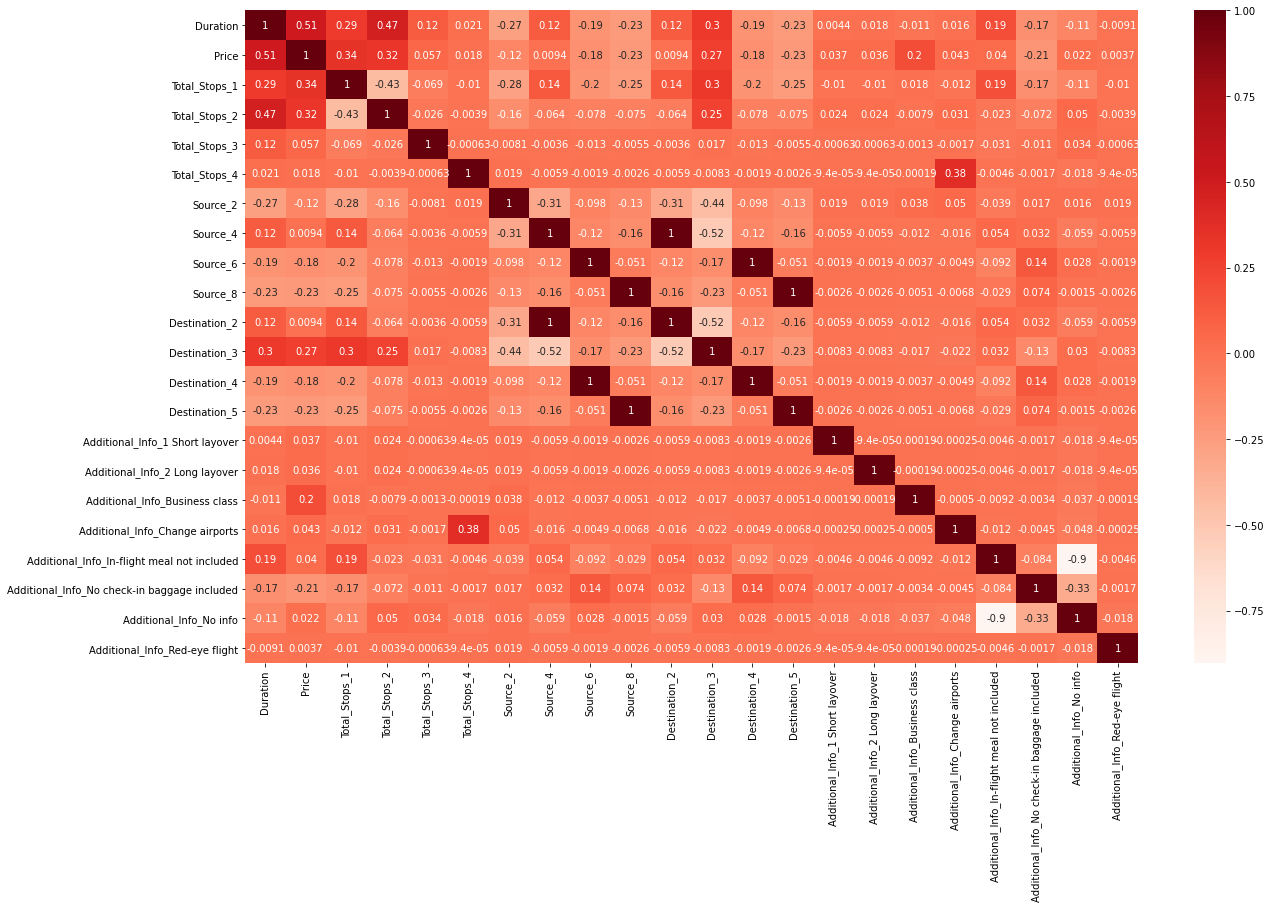

In [33]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),cmap=plt.cm.Reds,annot=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   Airline                                       10682 non-null  object        
 1   Date_of_Journey                               10682 non-null  datetime64[ns]
 2   Duration                                      10682 non-null  float64       
 3   Price                                         10682 non-null  float64       
 4   Total_Stops_1                                 10682 non-null  uint8         
 5   Total_Stops_2                                 10682 non-null  uint8         
 6   Total_Stops_3                                 10682 non-null  uint8         
 7   Total_Stops_4                                 10682 non-null  uint8         
 8   Source_2                                      10682 non-null  uint

# Feature Selection

In [35]:
X=df
X = X.drop(["Price","Airline","Date_of_Journey"],1)
X
#,19,20,21,22,23,24,25,26,27

,Duration,Total_Stops_1,Total_Stops_2,Total_Stops_3,Total_Stops_4,Source_2,Source_4,Source_6,Source_8,Destination_2,...,Destination_4,Destination_5,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,170.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,445.0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,1140.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,325.0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,285.0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,150.0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
10679,155.0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
10680,180.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10681,160.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [37]:
y = np.log(df.Price)
y

0        8.267962
1        8.944028
2        9.538348
3        8.735204
4        9.495670
           ...   
10678    8.320448
10679    8.329658
10680    8.885856
10681    9.445254
10682    9.371864
Name: Price, Length: 10682, dtype: float64

In [38]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [40]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Ridge Regression

In [41]:
params = {'alpha' : [0.001 , 0.001,0.01,0.05,
                     0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,.9,
                     1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,
                     10.0,20,30,40,50,100,500,1000]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                       param_grid = params,
                       scoring = 'neg_mean_absolute_error',
                       cv = folds,
                       return_train_score = True,
                       verbose = 1)
#verboseint
#Controls the verbosity: the higher, the more messages.
#>1 : the computation time for each fold and parameter candidate is displayed;
#>2 : the score is also displayed;
#>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.

model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0,
                                   5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40,
                                   50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [42]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.001}
-0.261344952012079


In [43]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004982,2.092193e-03,0.001599,0.000487,0.001,{'alpha': 0.001},-0.261096,-0.261827,-0.261321,-0.263997,...,-0.261345,0.001762,1,-0.260930,-0.260556,-0.260988,-0.260160,-0.261785,-0.260884,0.000540
1,0.003192,3.993039e-04,0.001596,0.000488,0.001,{'alpha': 0.001},-0.261096,-0.261827,-0.261321,-0.263997,...,-0.261345,0.001762,1,-0.260930,-0.260556,-0.260988,-0.260160,-0.261785,-0.260884,0.000540
2,0.003983,1.326859e-05,0.001822,0.000392,0.01,{'alpha': 0.01},-0.261099,-0.261826,-0.261313,-0.264004,...,-0.261346,0.001763,3,-0.260932,-0.260557,-0.260992,-0.260163,-0.261787,-0.260886,0.000540
3,0.003587,4.714825e-04,0.001802,0.000400,0.05,{'alpha': 0.05},-0.261112,-0.261820,-0.261279,-0.264034,...,-0.261348,0.001768,4,-0.260943,-0.260561,-0.261010,-0.260175,-0.261796,-0.260897,0.000540
4,0.002793,3.990651e-04,0.001197,0.000399,0.1,{'alpha': 0.1},-0.261128,-0.261814,-0.261284,-0.264070,...,-0.261361,0.001774,5,-0.260962,-0.260576,-0.261030,-0.260189,-0.261812,-0.260914,0.000541
5,0.003192,3.992319e-04,0.001596,0.000489,0.2,{'alpha': 0.2},-0.261158,-0.261805,-0.261333,-0.264133,...,-0.261392,0.001785,6,-0.261002,-0.260623,-0.261067,-0.260214,-0.261847,-0.260951,0.000542
6,0.002792,3.989935e-04,0.001599,0.000485,0.3,{'alpha': 0.3},-0.261186,-0.261800,-0.261374,-0.264189,...,-0.261420,0.001794,7,-0.261038,-0.260668,-0.261099,-0.260239,-0.261878,-0.260984,0.000542
7,0.003187,4.014276e-04,0.001200,0.000397,0.4,{'alpha': 0.4},-0.261212,-0.261796,-0.261408,-0.264239,...,-0.261445,0.001803,8,-0.261070,-0.260708,-0.261128,-0.260265,-0.261910,-0.261016,0.000543
8,0.002998,1.185168e-05,0.001590,0.000484,0.5,{'alpha': 0.5},-0.261257,-0.261795,-0.261438,-0.264283,...,-0.261472,0.001810,9,-0.261100,-0.260744,-0.261154,-0.260289,-0.261939,-0.261045,0.000543
9,0.003188,4.015695e-04,0.001804,0.000381,0.6,{'alpha': 0.6},-0.261299,-0.261795,-0.261464,-0.264324,...,-0.261496,0.001817,10,-0.261127,-0.260776,-0.261180,-0.260311,-0.261966,-0.261072,0.000544


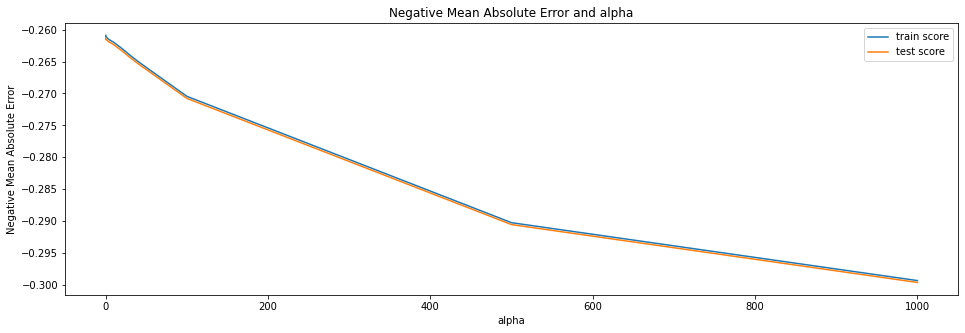

In [44]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [45]:
alpha = 0.001
ridge = Ridge(alpha=alpha)

ridge.fit(X_train,y_train)
ridge.coef_

array([ 1.33171172e-04,  6.56961007e-01,  8.32561481e-01,  8.04917615e-01,
        7.36941386e-01,  1.41561169e-01, -8.10490793e-03, -4.02120595e-03,
       -9.99862899e-02, -8.10490793e-03, -2.94487638e-02, -4.02120596e-03,
       -9.99862899e-02,  2.88629850e-02, -7.74628148e-02,  1.07928105e+00,
       -4.08912587e-01, -6.61646293e-01, -9.57048123e-01, -6.20998278e-01,
        5.59587982e-02])

In [46]:
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true = y_test,y_pred= y_test_pred))

0.6115914120999408


# Ridge with r2square

In [47]:
#list of alpha for tuning
params = {'alpha' : [0.001 , 0.001,0.01,0.05,
                     0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,.9,
                     1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,
                     10.0,20,30,40,50,100,500,1000]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                       param_grid = params,
                       scoring = 'r2',
                       cv = folds,
                       return_train_score = True,
                       verbose = 1)

model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0,
                                   5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40,
                                   50, 100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [48]:
#Checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.1}
0.5911933636264335


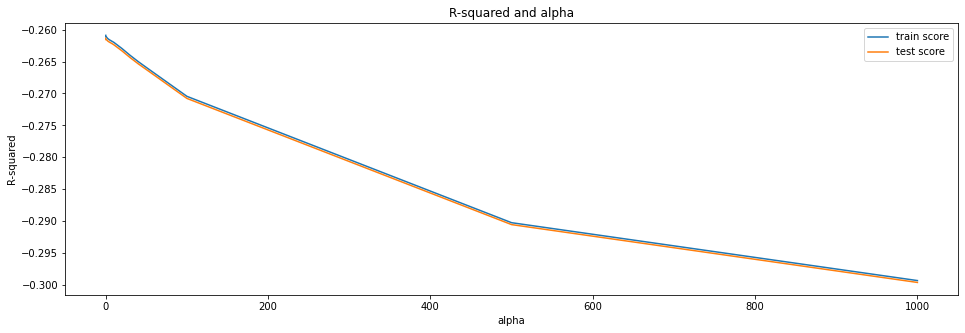

In [49]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R-squared')
plt.title("R-squared and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [50]:
alpha = 0.1
ridge = Ridge(alpha=alpha)

ridge.fit(X_train,y_train)
ridge.coef_

array([ 1.33599199e-04,  6.56593305e-01,  8.31798497e-01,  8.01631184e-01,
        6.54178677e-01,  1.41606450e-01, -8.12502539e-03, -4.09804006e-03,
       -1.00016613e-01, -8.12502539e-03, -2.93667715e-02, -4.09804006e-03,
       -1.00016613e-01,  3.70936826e-02, -5.99449041e-02,  1.03958629e+00,
       -3.80065670e-01, -6.50063615e-01, -9.45070292e-01, -6.09391525e-01,
        6.13335227e-02])

In [51]:
# lets check the R-squared value of test set
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true = y_test,y_pred= y_test_pred))

0.6116725014243747


# Lasso Regression 

In [52]:
params = {'alpha' : [0.001 , 0.001,0.01,0.05,
                     0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,.9,
                     1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,
                     10.0,20,30,40,50,100,500,1000]}

lasso = Lasso()
folds = 5
# cross validation
model_cv_lasso_neg_mean = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso_neg_mean.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0,
                                   5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40,
                                   50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [53]:
print(model_cv_lasso_neg_mean.best_params_)
print(model_cv_lasso_neg_mean.best_score_)

{'alpha': 0.001}
-0.2628663957432088


In [54]:
cv_results1 = pd.DataFrame(model_cv_lasso_neg_mean.cv_results_)
cv_results1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005287,0.000740,0.001395,0.000489,0.001,{'alpha': 0.001},-0.263597,-0.262826,-0.262125,-0.265749,...,-0.262866,0.001866,1,-0.262387,-0.262377,-0.262662,-0.261630,-0.263554,-0.262522,0.000619
1,0.004603,0.000384,0.001099,0.000486,0.001,{'alpha': 0.001},-0.263597,-0.262826,-0.262125,-0.265749,...,-0.262866,0.001866,1,-0.262387,-0.262377,-0.262662,-0.261630,-0.263554,-0.262522,0.000619
2,0.004415,0.000805,0.001807,0.000405,0.01,{'alpha': 0.01},-0.277718,-0.279873,-0.275920,-0.280558,...,-0.277886,0.002067,3,-0.276974,-0.277957,-0.278238,-0.277137,-0.277443,-0.277550,0.000480
3,0.003199,0.000411,0.000985,0.000013,0.05,{'alpha': 0.05},-0.315469,-0.325553,-0.318661,-0.324682,...,-0.320771,0.003804,4,-0.321247,-0.319993,-0.321527,-0.318672,-0.321693,-0.320626,0.001145
4,0.002891,0.000197,0.001297,0.000398,0.1,{'alpha': 0.1},-0.321136,-0.332205,-0.325389,-0.331572,...,-0.327276,0.004134,5,-0.328531,-0.326069,-0.327759,-0.325750,-0.327741,-0.327170,0.001073
5,0.002998,0.000018,0.001397,0.000485,0.2,{'alpha': 0.2},-0.321141,-0.332205,-0.325395,-0.331571,...,-0.327280,0.004131,6,-0.328535,-0.326074,-0.327763,-0.325752,-0.327744,-0.327174,0.001073
6,0.003216,0.000401,0.001293,0.000419,0.3,{'alpha': 0.3},-0.321146,-0.332204,-0.325400,-0.331569,...,-0.327284,0.004128,7,-0.328540,-0.326079,-0.327767,-0.325755,-0.327747,-0.327178,0.001073
7,0.003306,0.000416,0.001395,0.000502,0.4,{'alpha': 0.4},-0.321152,-0.332204,-0.325406,-0.331568,...,-0.327288,0.004125,8,-0.328544,-0.326083,-0.327771,-0.325758,-0.327751,-0.327181,0.001073
8,0.003792,0.000401,0.001602,0.000493,0.5,{'alpha': 0.5},-0.321157,-0.332203,-0.325411,-0.331567,...,-0.327292,0.004122,9,-0.328549,-0.326088,-0.327776,-0.325761,-0.327754,-0.327185,0.001074
9,0.003411,0.000472,0.001013,0.000036,0.6,{'alpha': 0.6},-0.321162,-0.332203,-0.325417,-0.331566,...,-0.327296,0.004119,10,-0.328553,-0.326093,-0.327780,-0.325764,-0.327757,-0.327190,0.001074


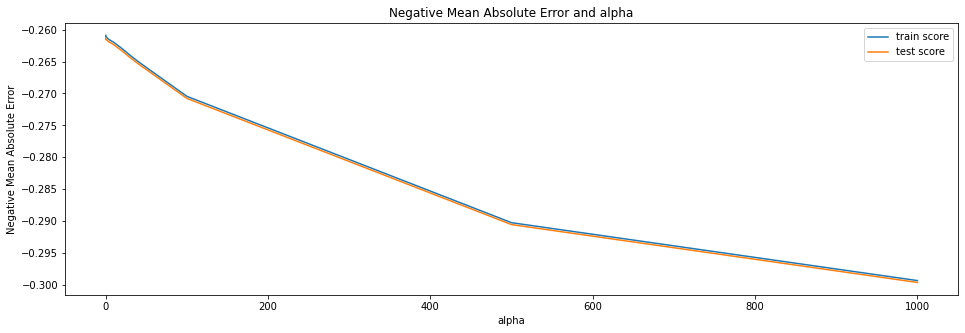

In [55]:


# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()



In [56]:
alpha = 0.001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train,y_train)

Lasso(alpha=0.001)

In [57]:
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.6039615658045193


# Lasoo with r2square

In [58]:

#lets find out the R-squared value of the lasso model
model_cv1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv1.fit(X_train, y_train) 



Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=Lasso(alpha=0.001),
             param_grid={'alpha': [0.001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0,
                                   5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40,
                                   50, 100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [59]:
#Checking the value of optimum number of parameters
print(model_cv1.best_params_)
print(model_cv1.best_score_)

{'alpha': 0.001}
0.5829643723278469


In [60]:
# cv results
cv_results2 = pd.DataFrame(model_cv1.cv_results_)
cv_results2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005584,4.880718e-04,0.001197,3.986598e-04,0.001,{'alpha': 0.001},0.569871,0.594675,0.584815,0.562437,...,0.582964,0.015071,1,0.587660,0.581695,0.584765,0.589570,0.578674,0.584473,0.003939
1,0.005386,4.889088e-04,0.001795,3.990412e-04,0.001,{'alpha': 0.001},0.569871,0.594675,0.584815,0.562437,...,0.582964,0.015071,1,0.587660,0.581695,0.584765,0.589570,0.578674,0.584473,0.003939
2,0.005587,4.866370e-04,0.001594,4.901800e-04,0.01,{'alpha': 0.01},0.529162,0.544089,0.542862,0.515901,...,0.538823,0.015522,3,0.544734,0.536228,0.538695,0.545191,0.537116,0.540393,0.003817
3,0.004987,8.919101e-04,0.002120,4.582293e-04,0.05,{'alpha': 0.05},0.385951,0.372484,0.380430,0.350194,...,0.378102,0.016868,4,0.379813,0.378447,0.377385,0.388646,0.371001,0.379058,0.005667
4,0.005387,1.016518e-03,0.002393,4.856054e-04,0.1,{'alpha': 0.1},0.357794,0.344549,0.352059,0.322613,...,0.349985,0.016550,5,0.348945,0.352253,0.350370,0.357289,0.345068,0.350785,0.004017
5,0.004389,4.889670e-04,0.001795,3.992083e-04,0.2,{'alpha': 0.2},0.357786,0.344560,0.352047,0.322642,...,0.349984,0.016533,6,0.348945,0.352252,0.350370,0.357289,0.345067,0.350785,0.004017
6,0.004787,9.773406e-04,0.001795,7.462004e-04,0.3,{'alpha': 0.3},0.357778,0.344572,0.352034,0.322670,...,0.349983,0.016515,7,0.348944,0.352252,0.350369,0.357288,0.345067,0.350784,0.004017
7,0.004388,7.980824e-04,0.001998,6.363446e-04,0.4,{'alpha': 0.4},0.357769,0.344583,0.352021,0.322698,...,0.349982,0.016498,8,0.348943,0.352251,0.350368,0.357287,0.345066,0.350783,0.004017
8,0.005088,2.020612e-04,0.002193,7.467357e-04,0.5,{'alpha': 0.5},0.357761,0.344593,0.352008,0.322726,...,0.349981,0.016481,9,0.348942,0.352249,0.350367,0.357286,0.345064,0.350782,0.004017
9,0.003989,6.315052e-04,0.001795,7.465441e-04,0.6,{'alpha': 0.6},0.357752,0.344604,0.351994,0.322753,...,0.349980,0.016463,10,0.348940,0.352248,0.350365,0.357284,0.345063,0.350780,0.004017


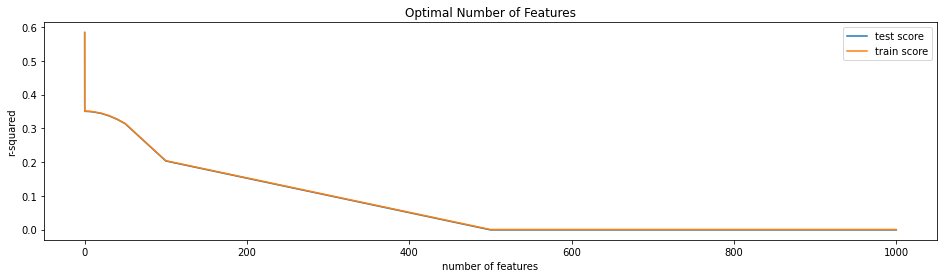

In [61]:
# plotting cv results
plt.figure(figsize=(16,4))

plt.plot(cv_results1["param_alpha"], cv_results2["mean_test_score"])
plt.plot(cv_results1["param_alpha"], cv_results2["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

In [62]:
# fitting lasso with alpha 0.001

alpha = 0.001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train,y_train)

Lasso(alpha=0.001)

In [63]:
#lets predict the R-squared value of test and train data
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.6039615658045193


In [64]:
coef = pd.DataFrame(index = X.columns)
coef.rows = X.columns
coef["ridge"] = ridge.coef_
coef["lasso"] = lasso.coef_
c= coef.transpose()

<ipython-input-64-c2fbee6bfff5>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  coef.rows = X.columns


In [65]:
c

,Duration,Total_Stops_1,Total_Stops_2,Total_Stops_3,Total_Stops_4,Source_2,Source_4,Source_6,Source_8,Destination_2,...,Destination_4,Destination_5,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
ridge,0.000134,0.656593,0.831798,0.801631,0.654179,0.141606,-0.008125,-0.004098,-0.100017,-0.008125,...,-0.004098,-0.100017,0.037094,-0.059945,1.039586,-0.380066,-0.650064,-0.945070,-0.609392,0.061334
lasso,0.000164,0.627006,0.780448,0.510753,0.000000,0.161424,0.000000,0.000000,-0.158490,0.000000,...,0.000000,-0.011868,0.000000,0.000000,0.000000,0.000000,-0.039192,-0.306877,-0.000000,0.000000
